In [35]:
import pandas as pd
import matplotlib.pyplot as plt


In [36]:
df = pd.read_csv("mcs_ds_edited_iter_shuffled.csv")
df.head()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
0,30,15,200,40,0.773546,0.250555
1,15,15,100,70,0.911941,0.498329
2,30,15,100,50,0.814867,0.255546
3,15,20,100,20,1.435332,0.394603
4,30,15,100,40,1.265909,0.302943


In [37]:
print(df.columns)

X_columns = ['anchor_ratio', 'trans_range', 'node_density', 'iterations', 'ale']

Index(['anchor_ratio', 'trans_range', 'node_density', 'iterations', 'ale',
       'sd_ale'],
      dtype='object')


In [38]:
df.isna().sum()


anchor_ratio    0
trans_range     0
node_density    0
iterations      0
ale             0
sd_ale          0
dtype: int64

In [ ]:

import plotly.subplots as sp
import plotly.graph_objects as go

# Define your columns (assuming df is already loaded)
X_columns = ['anchor_ratio', 'trans_range', 'node_density', 'iterations', 'ale', 'sd_ale']

# Create subplots
fig = sp.make_subplots(rows=3, cols=2, subplot_titles=X_columns)

# Add histograms to subplots
for i, col in enumerate(X_columns):
    fig.add_trace(go.Histogram(x=df[col], nbinsx=20), row=i//2+1, col=i%2+1)

# Update layout
fig.update_layout(height=1300, width=1200, title="Histograms of Variables", showlegend=False)
fig.show()


In [40]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplots: 2 rows and 3 columns
fig = make_subplots(rows=2, cols=3, 
                    subplot_titles=("Anchor Ratio", "Trans Range", "Node Density", 
                                    "Iterations", "ALE", "SD ALE"))

# Add each box plot to the subplot
fig.add_trace(go.Box(y=df['anchor_ratio'], name="Anchor Ratio"), row=1, col=1)
fig.add_trace(go.Box(y=df['trans_range'], name="Trans Range"), row=1, col=2)
fig.add_trace(go.Box(y=df['node_density'], name="Node Density"), row=1, col=3)
fig.add_trace(go.Box(y=df['iterations'], name="Iterations"), row=2, col=1)
fig.add_trace(go.Box(y=df['ale'], name="ALE"), row=2, col=2)
fig.add_trace(go.Box(y=df['sd_ale'], name="SD ALE"), row=2, col=3)

# Update layout for better appearance
fig.update_layout(title_text="Box Plots of Various Metrics", 
                  height=600, width=1000,
                  showlegend=False)  # Hide individual legends

# Show the figure
fig.show()


In [28]:
import plotly.express as px

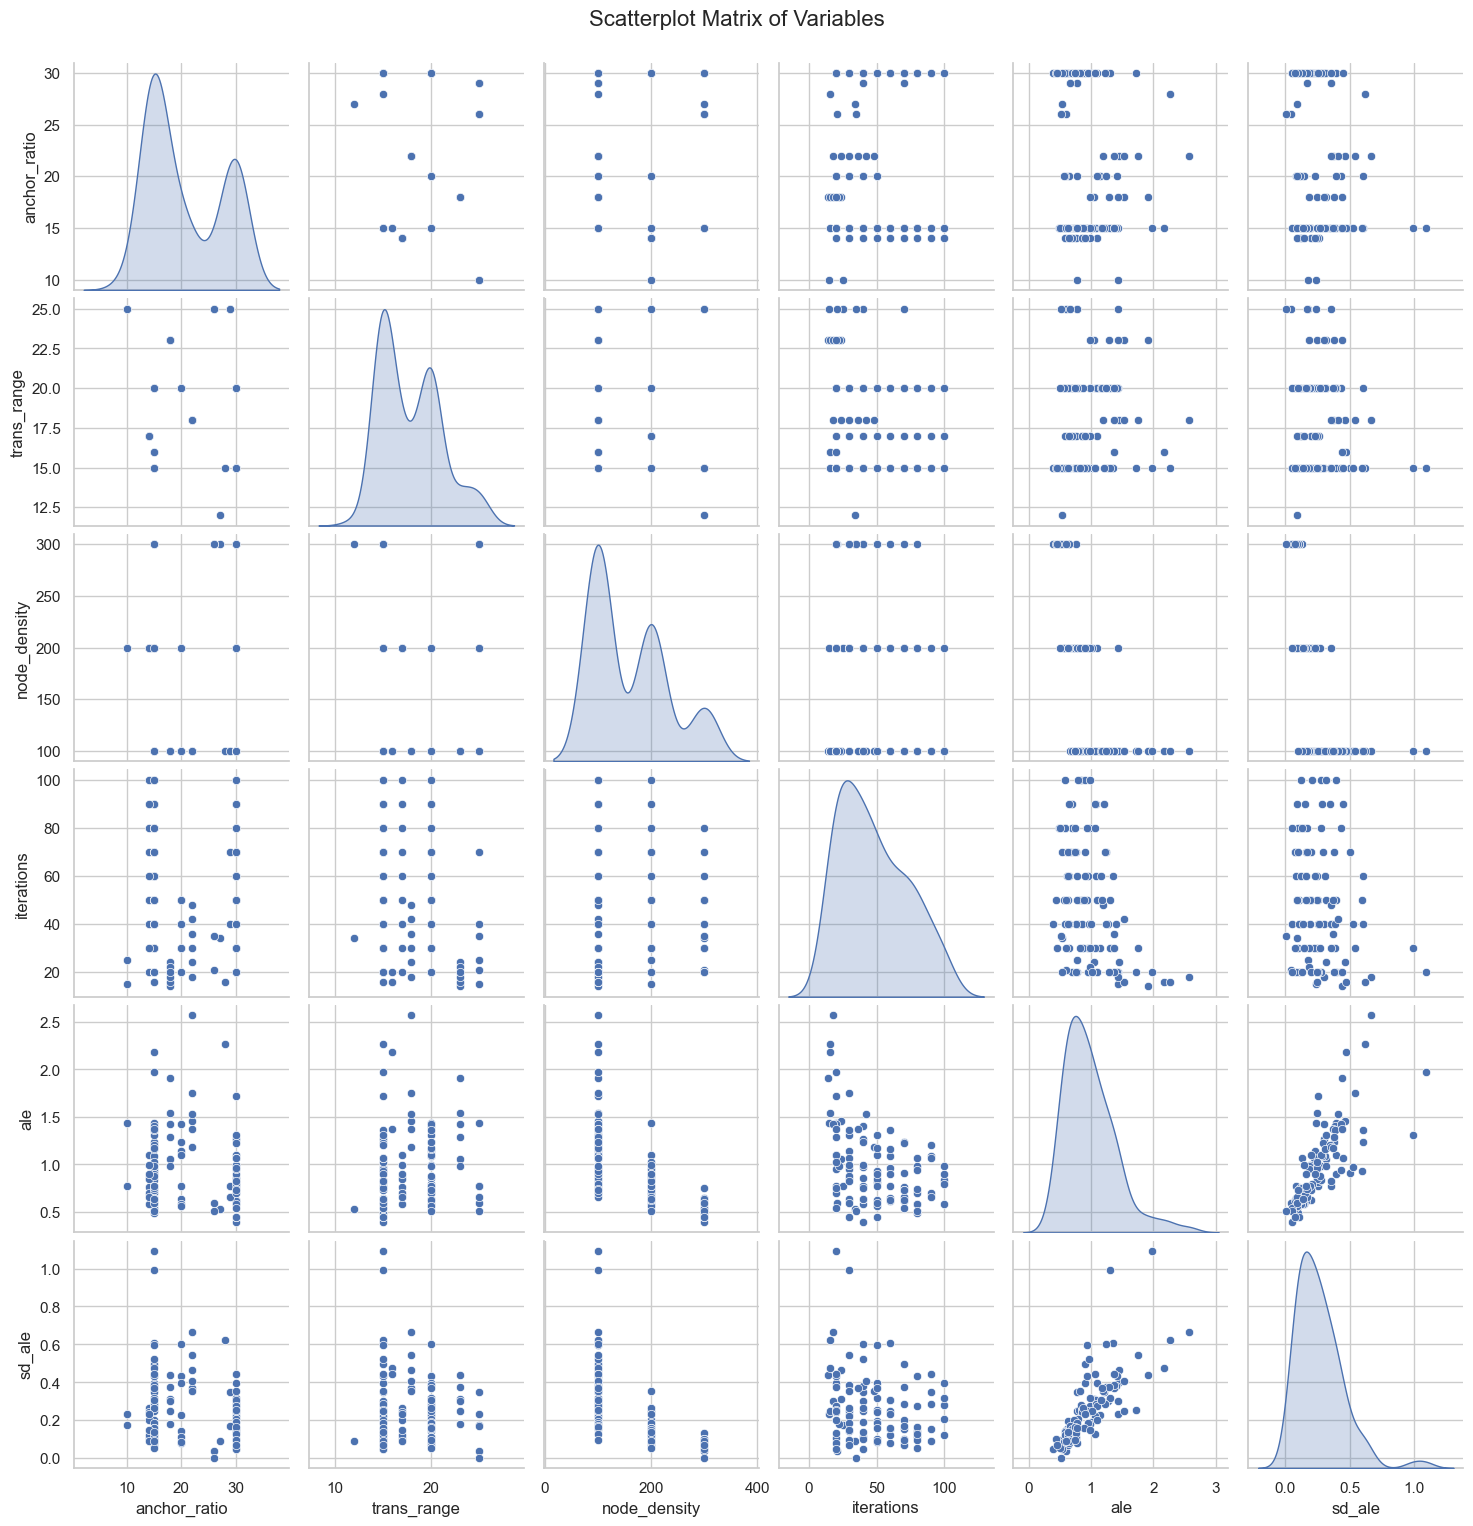

In [47]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

# Create a scatterplot matrix (pairplot)
pairplot = sns.pairplot(df[X_columns], diag_kind='kde', palette='Set2', markers='o')

# Customizing the plot
pairplot.fig.suptitle('Scatterplot Matrix of Variables', y=1.02, fontsize=16)

# Show the plot
plt.show()

In [32]:
covariance_matrix = df.cov()

fig = px.imshow(covariance_matrix, 
                text_auto=True,  
                aspect="auto",   
                color_continuous_scale='Viridis', 
                title="Covariance Matrix Heatmap"
)

fig.show()


In [67]:
import plotly.graph_objects as go
import plotly.subplots as sp

# Assuming df and X_columns are defined
X_columns = ['anchor_ratio', 'trans_range', 'node_density', 'iterations', 'ale', 'sd_ale']

# Create subplots grid (number of rows and columns based on X_columns length)
fig = sp.make_subplots(rows=len(X_columns), cols=len(X_columns), shared_xaxes=True, shared_yaxes=True)

# Generate contour plots for each pair of variables
for i, var1 in enumerate(X_columns):
    for j, var2 in enumerate(X_columns):
        if i < j:  # Only create contour plots for lower triangle (i < j)
            contour = go.Histogram2dContour(
                x=df[var2], 
                y=df[var1], 
                colorscale='Plasma', 
                contours=dict(showlabels=True, labelfont=dict(size=10)),
                colorbar=dict(title="Density")
            )
            fig.add_trace(contour, row=i+1, col=j+1)
        else:
            fig.update_xaxes(visible=False, row=i+1, col=j+1)
            fig.update_yaxes(visible=False, row=i+1, col=j+1)

# Update layout
fig.update_layout(
    title="Contour Plots for Each Pair of Variables", 
    height=1200, 
    width=1200, 
    showlegend=False
)

# Show the plot
fig.show()


C:\Users\nites\AppData\Local\Temp\ipykernel_7828\264005598.py:25: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



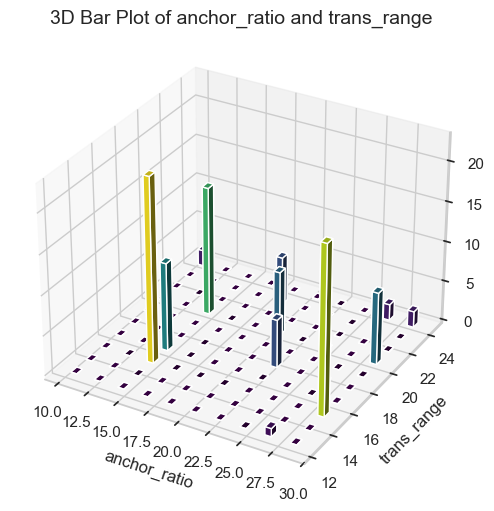

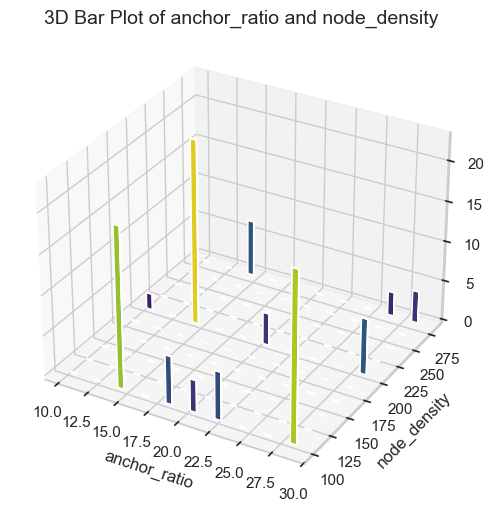

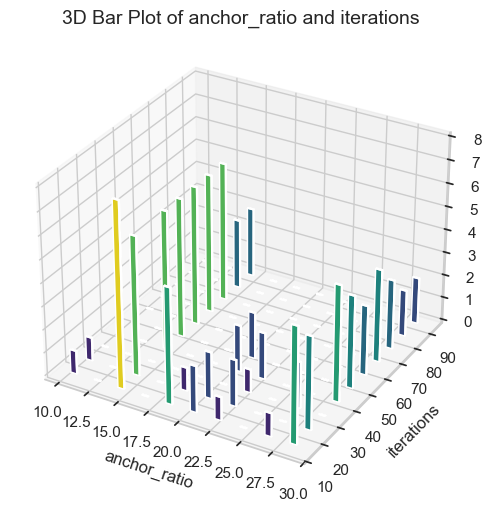

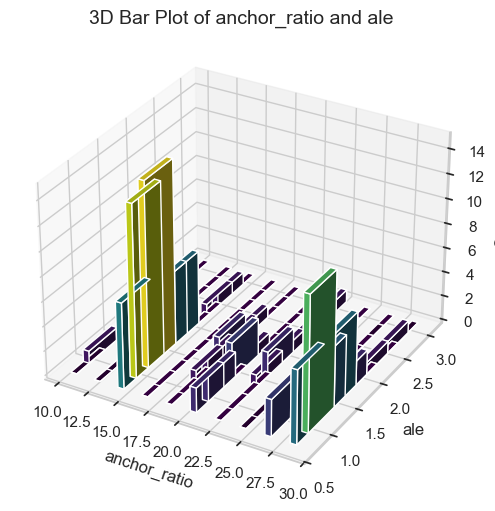

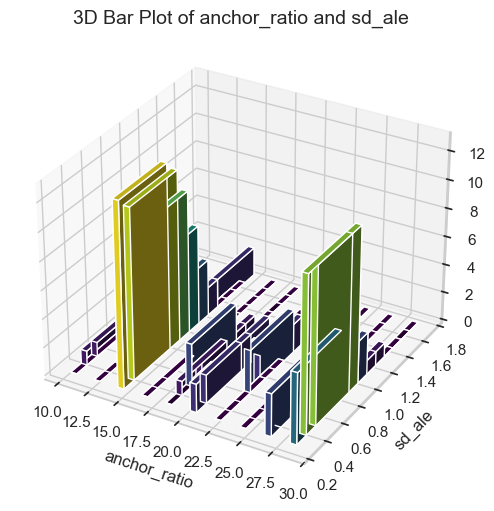

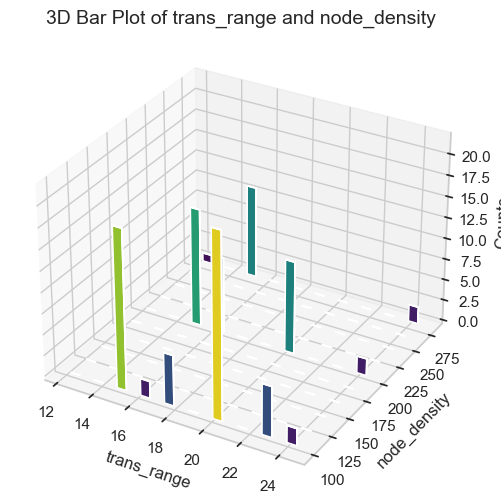

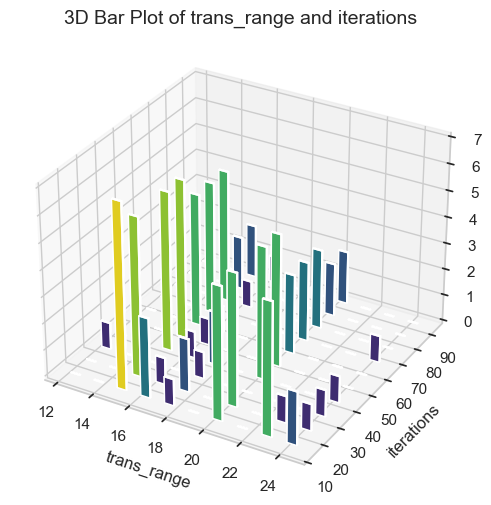

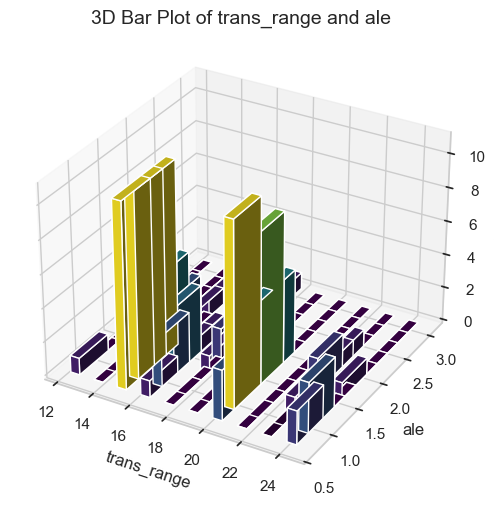

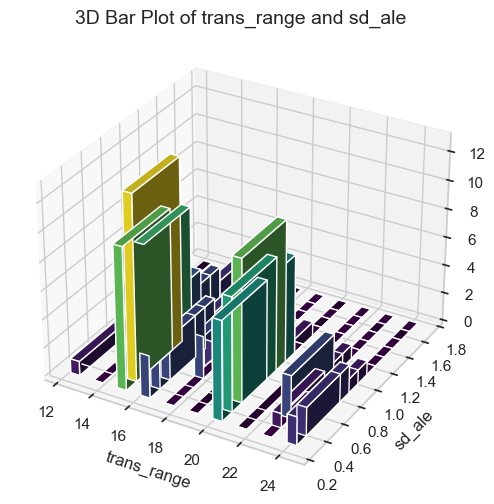

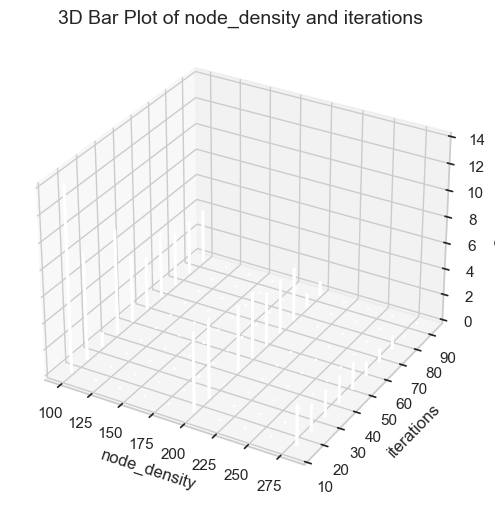

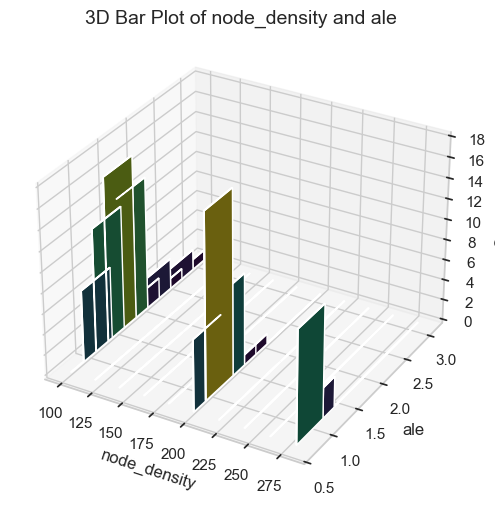

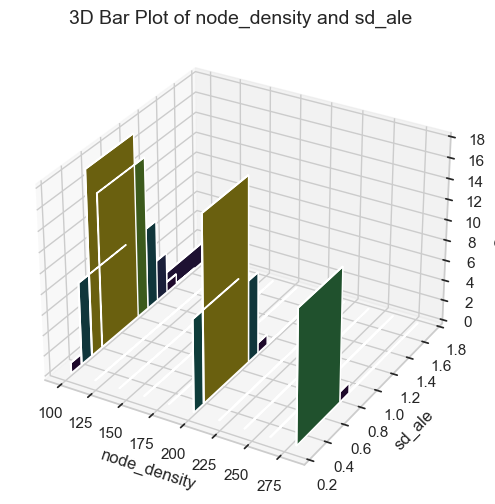

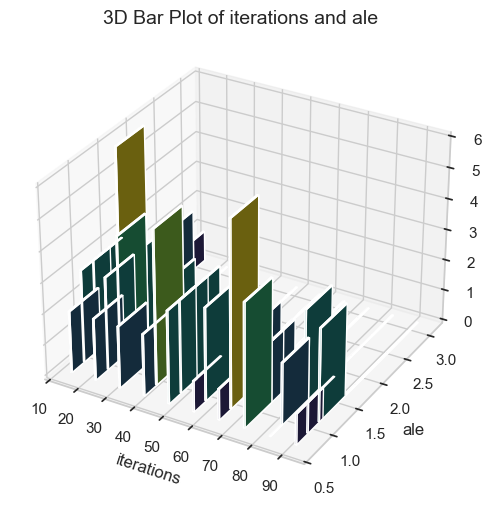

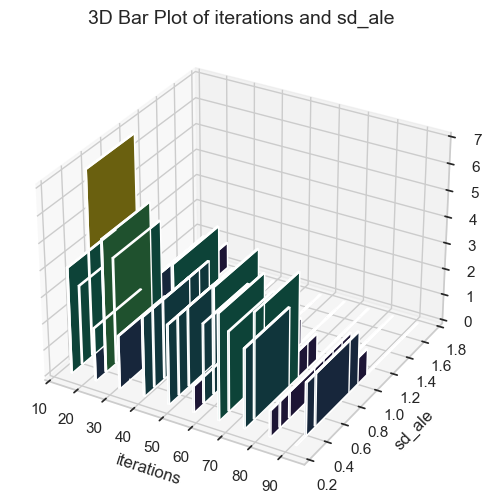

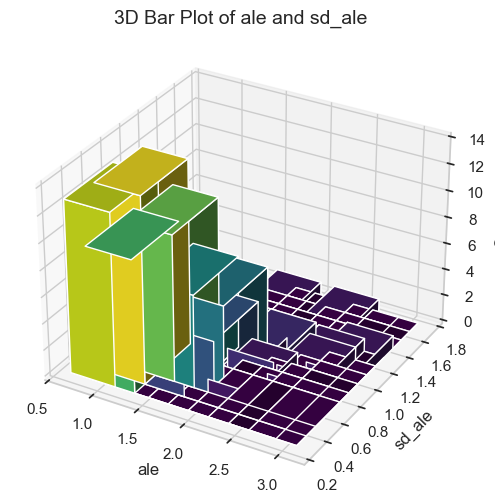

In [19]:
import numpy as np
from itertools import combinations  # Import combinations

# Function to create 3D bar plot for a pair of variables
def plot_3d_bar(df, var1, var2, cmap_name='viridis'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Create 2D histogram for the pair of variables
    hist, xedges, yedges = np.histogram2d(df[var1], df[var2], bins=10)

    # Construct positions for bars
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    # Heights of bars
    dz = hist.ravel()

    # Width and depth of bars
    dx = dy = 0.5 * np.ones_like(dz)

    # Color mapping for bars
    colors = plt.cm.get_cmap(cmap_name)(dz / dz.max() if dz.max() > 0 else dz)  # Normalize heights safely

    # Plot 3D bars
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors, zsort='average')

    # Labels and Title
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.set_zlabel('Counts')
    ax.set_title(f'3D Bar Plot of {var1} and {var2}', fontsize=14)

    plt.show()  # Display each plot separately

# Assuming your variables are stored in the `df` DataFrame
X_columns = df.columns.tolist()  # Replace with specific column names if necessary
combinations_of_columns = list(combinations(X_columns, 2))  # Generate all pairs of columns

# Loop through each pair of variables to create 3D bar plots
for var1, var2 in combinations_of_columns:
    plot_3d_bar(df, var1, var2)


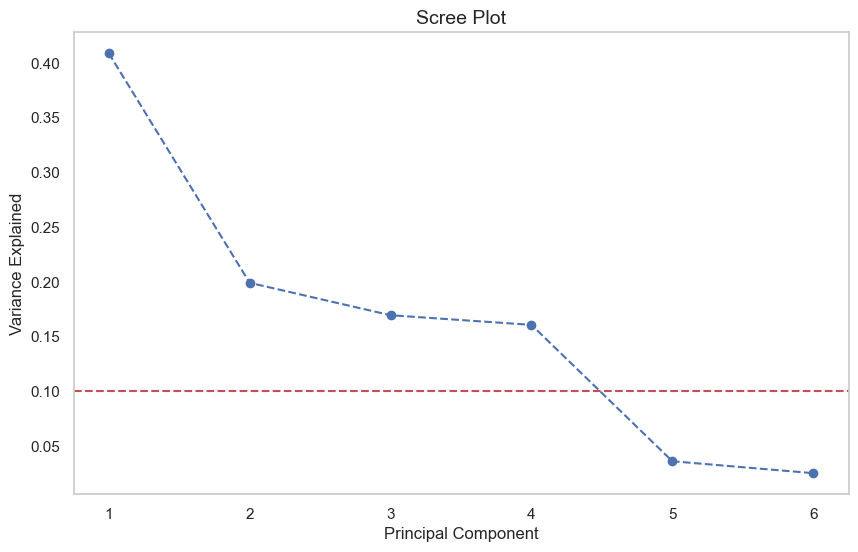

Minimum number of components needed to explain at least 95% of the variance: 5


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = df[X_columns]  # Use the relevant columns for PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Perform PCA
pca = PCA()
pca.fit(scaled_features)

# Step 3: Create a Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X_columns) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot', fontsize=14)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Variance Explained', fontsize=12)
plt.xticks(np.arange(1, len(X_columns) + 1))
plt.grid()
plt.axhline(y=0.1, color='r', linestyle='--')  # Optional: horizontal line to indicate a threshold
plt.show()

# Step 3: Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 4: Find the minimum number of components needed to explain at least 95% of the variance
min_components = np.argmax(cumulative_variance >= 0.95) + 1  # +1 because index starts at 0

print(f'Minimum number of components needed to explain at least 95% of the variance: {min_components}')

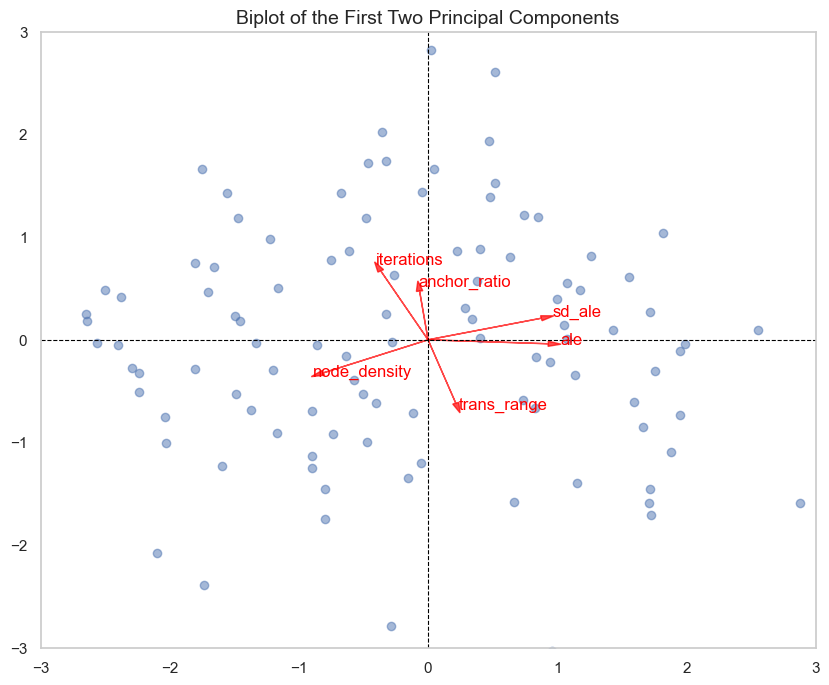

In [ ]:
# 7) Biplot for the first two principal components
features = df[X_columns]  # Use the relevant columns for PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Perform PCA
pca = PCA(n_components=3)
pca_scores = pca.fit_transform(scaled_features)

# Step 3: Get the loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Step 4: Create a biplot
plt.figure(figsize=(10, 8))

# Plot PCA scores
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], alpha=0.5)

# Plot PCA loadings
for i, var in enumerate(X_columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1],
              color='red', alpha=0.7,
              head_width=0.05, head_length=0.1)
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, var, color='red', fontsize=12)


plt.title('Biplot of the First Two Principal Components', fontsize=14)
plt.grid()

plt.xlim(-3, 3) 
plt.ylim(-3, 3) 
plt.axhline(0, color='black', lw=0.8, ls='--')
plt.axvline(0, color='black', lw=0.8, ls='--')

plt.show()